In [21]:
import sys, os
import math
import h5py
import matplotlib.pyplot as plt

import math
import scipy
import numpy as np
import csv
sys.path.append('/Users/ajc/codes/simulator/debug/ats/tools/utils/')
import parse_ats
import h5py
import mesh
import transect_data
from matplotlib.cm import get_cmap
from scipy.interpolate import interp2d
from scipy import interpolate

In [2]:
path='/Users/ajc/FUSE/simulations/barrow_icewedges/hydrologic_connection/Spinup/test/'
#Projections/CESM_C3/'


In [3]:
cycles, times, dat = parse_ats.readATS(path)#,timeunits='noleap')

<HDF5 file "visdump_data.h5" (mode r)>


In [4]:
#print (dat.keys())

In [5]:
#data = h5py.File(path + 'visdump_data.h5','r')
#print (data)
#print(data.keys(),keys)
#cycles = list(data['base_porosity.cell.0'])
#cycles

In [6]:
d = list(dat[list(dat.keys())[0]][cycles[0]])

In [7]:
col_dat, xyz = transect_data.transect_data(['temperature'], directory=path,return_map=True)

Mesh type:  HEX


In [8]:
def get_meshgrid():
    lx = len(col_dat[0,0,:,0])
    ly = len(col_dat[1,0,0,:])
    Mx = np.zeros((ly,lx))
    My = np.zeros((ly,lx))
    for i in range(lx):
        My[:,i] = np.array(col_dat[1,0,i,:][::-1])
    for i in range(ly):
        Mx[i,:] = col_dat[0,0,:,0]
    return Mx,My

def get_data_per_cycle(cycle = -1):
    return np.transpose(col_dat[2,0,:,:])

In [9]:
X,Y = get_meshgrid()
Z = get_data_per_cycle(cycle=0)
print (Z.shape, Y.shape, X.shape)
print (X)

(85, 38) (85, 38) (85, 38)
[[0.09508 0.28525 0.47543 ... 8.01526 8.255   8.49476]
 [0.09508 0.28525 0.47543 ... 8.01526 8.255   8.49476]
 [0.09508 0.28525 0.47543 ... 8.01526 8.255   8.49476]
 ...
 [0.09508 0.28525 0.47543 ... 8.01526 8.255   8.49476]
 [0.09508 0.28525 0.47543 ... 8.01526 8.255   8.49476]
 [0.09508 0.28525 0.47543 ... 8.01526 8.255   8.49476]]


In [ ]:
print (col_dat.shape,38*85)
#col_dat[0,0,:,:] x-coord centroid
#col_dat[1,0,:,:] z-coord centroid
#col_dat[2,0,:,:] variable data at 0th time step
#col_dat[2,1,:,:] variable data at 1st time step and so on
#rint (col_dat[2,0,:,:])
#print (col_dat[0,0,:,0])
#print (col_dat[2,0,:,:])
lx = len(col_dat[0,0,:,0])
ly = len(col_dat[1,0,0,:])
Mx = np.zeros((ly,lx))
MY = np.zeros((ly,lx))
X1 = col_dat[0,0,:,0]
Y1 = col_dat[1,0,0,:][::-1]

#print (lx,ly)
print (Y1.shape)
for i in range(lx):
    MY[:,i] = np.array(col_dat[1,0,i,:][::-1])
    Mx[i,:] = np.array(col_dat[1,0,:,i][::-1])
X,Y = np.meshgrid(X1,Y1)
Z= np.transpose(col_dat[2,0,:,:])
#Z= col_dat[2,0,:,:]
print (Y.shape, MY.shape, X.shape, Mx.shape)
print (X)

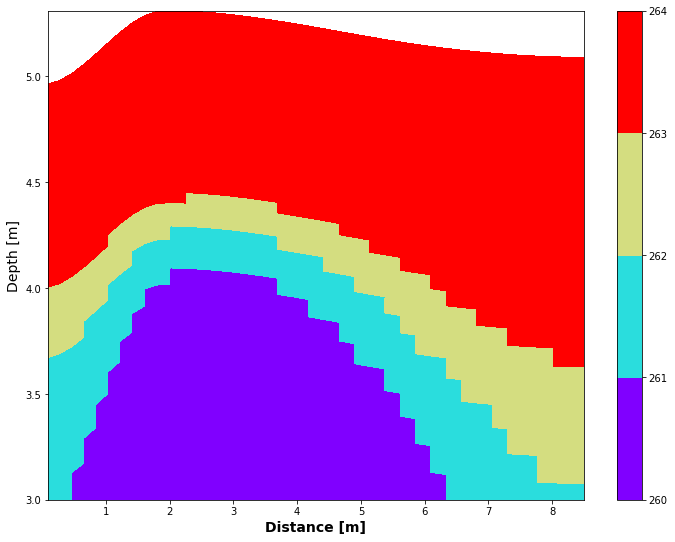

In [39]:
from matplotlib.colors import BoundaryNorm
fig,ax = plt.subplots(figsize=(12,9))
#wspd_contours = plt.contourf(X,MY,Z,cmap=get_cmap("rainbow"))
#plt.colorbar(wspd_contours, ax=ax, orientation="vertical", pad=.05)

levels = list(range(260, 265, 1))
cmap = plt.get_cmap('rainbow')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
wspd_contours = ax.pcolormesh(X, Y, Z, cmap=get_cmap("rainbow"), vmin=260, vmax=265,norm=norm)
plt.colorbar(wspd_contours, ax=ax, orientation="vertical", pad=.05)

#plt.grid()
ax.grid(True, which='minor', axis='both', linestyle='-', color='k')
plt.ylim(3,)
plt.xlabel('Distance [m]',fontsize=14,fontweight='bold')
plt.ylabel('Depth [m]',fontsize=14)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
d = col_dat[2,0,:,:]#np.concatenate(col_dat[2,0,:,:])
#a = transect_data.plot(d,ax,directory=path)

In [ ]:
x= col_dat[0,0,:,:]
print (x.shape)
y = col_dat[1,0,:,:]
print (y.shape)
coords = np.array([[x],[y]])
coords.shape

In [ ]:
print (x,y)

In [ ]:
%matplotlib inline
fig = plt.figure()
im = ax.imshow(coords)

In [ ]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

In [ ]:
Z.shape